In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, _x), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[5 0 4 1 9 2 1 3 1 4]


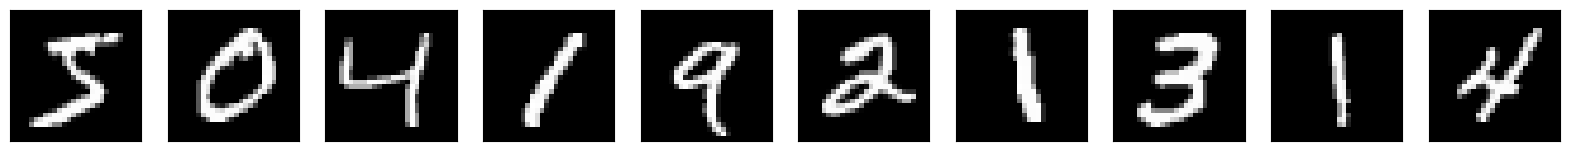

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt. figure(figsize = (20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt. imshow(x_train[i].reshape(28, 28))
    plt. gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

print(_x[:10])

In [ ]:
  # Normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
# linearising
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
original_dim = x_train.shape[1]
print(original_dim)
latent_dim = 32

784


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


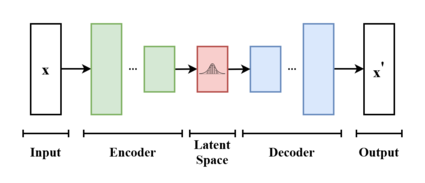

In [ ]:
# Encoder
encoder_inputs = keras.Input(shape=(original_dim,))
x = layers.Dense(128, activation="relu")(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [ ]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.keras.backend.random_normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

 returns </br>

 $z_m + exp(0.5* \log σ) * \epsilon $

In [ ]:
# Sampling layer - samples mean and log variance of the distribution
z = layers.Lambda(sampling)([z_mean, z_log_var])

In [ ]:
# Decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(128, activation="relu")(decoder_inputs)
outputs = layers.Dense(original_dim, activation="sigmoid")(x)

In [ ]:
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
decoder = keras.Model(decoder_inputs, outputs, name="decoder")

In [ ]:
# Define the VAE model
outputs = decoder(encoder(encoder_inputs)[2])
vae = keras.Model(encoder_inputs, outputs, name="vae")

#### Kullback–Leibler divergence:


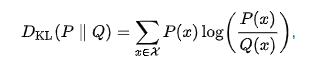


$ kl-loss=1+ log(z\_log\_var)−z\_log\_var−z^2_m +exp(z\_log\_var) $



In [ ]:
# Loss function
# Reconstruction loss
reconstruction_loss = keras.losses.binary_crossentropy(encoder_inputs, outputs)
reconstruction_loss *= original_dim
# KL loss
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [ ]:
vae.compile(optimizer='adam')

vae.fit(x_train, epochs=20, batch_size=64)

# Compression and decompression
compressed_data, _, _ = encoder.predict(x_test)
reconstructed_data = decoder.predict(compressed_data)

Epoch 1/20
938/938 [==============================] - 15s 15ms/step - loss: 167.3973
Epoch 2/20
938/938 [==============================] - 14s 15ms/step - loss: 128.2939
Epoch 3/20
938/938 [==============================] - 15s 15ms/step - loss: 120.0626
Epoch 4/20
938/938 [==============================] - 9s 10ms/step - loss: 116.3844
Epoch 5/20
938/938 [==============================] - 9s 10ms/step - loss: 114.3283
Epoch 6/20
938/938 [==============================] - 9s 9ms/step - loss: 112.9628
Epoch 7/20
938/938 [==============================] - 7s 8ms/step - loss: 112.0556
Epoch 8/20
938/938 [==============================] - 8s 9ms/step - loss: 111.3689
Epoch 9/20
938/938 [==============================] - 8s 9ms/step - loss: 110.7822
Epoch 10/20
938/938 [==============================] - 8s 8ms/step - loss: 110.3038
Epoch 11/20
938/938 [==============================] - 9s 9ms/step - loss: 109.8640
Epoch 12/20
938/938 [==============================] - 7s 7ms/step - loss: 10

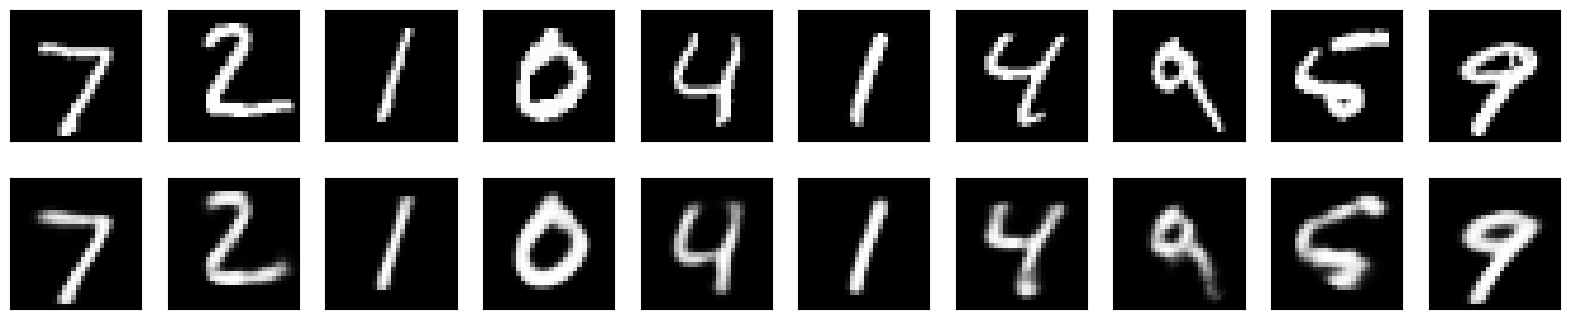

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt. figure(figsize = (20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt. subplot (2, n, i + 1 + n)
    plt.imshow(reconstructed_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis() .set_visible(False)
plt. show ()

1/1 [==============================] - 0s 20ms/step
Original images: 



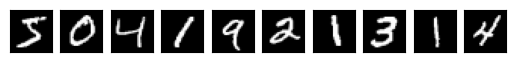

Reconstructed images: 



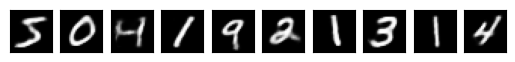

In [ ]:
n_ =10
compressed_data1, _, _ = encoder.predict(x_train[:n_])
reconstructed_data1 = decoder.predict(compressed_data1)

print("Original images: \n")
for i in range(n_):
    ax = plt.subplot(2, n, i + 1)
    plt. imshow(x_train[i].reshape(28, 28))
    plt. gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Reconstructed images: \n")
for i in range(n_):
    ax = plt. subplot (2, n, i + 1 + n)
    plt.imshow(reconstructed_data1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis() .set_visible(False)
plt. show ()



In [ ]:
print(reconstructed_data1.shape)

(10, 784)


In [ ]:
import os
folder_path = "/content/testdata"
files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.jpeg')]
n = len(files)
# print(n)


plt. figure(figsize = (20, 4))

for i in range(n):
    file_path = os.path.join(folder_path, files[i])
    img = Image.open(file_path)

    img_resized = img.resize((28, 28))
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_resized, cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

FileNotFoundError: ignored

In [ ]:

import PIL
from PIL import Image

files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.jpeg')]
n = len(files)

# Create an empty array to store the resized images
x_retest = np.empty((28, 28, 0), dtype=np.uint8)

for i in range(n):
    file_path = os.path.join(folder_path, files[i])
    img = Image.open(file_path)
    # img = PIL.ImageOps.invert(img)


    img_resized = img.resize((28, 28))
    x_retest = np.concatenate((x_retest, img_resized), axis=-1)

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(img_resized, cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()



In [ ]:
num =len(files)
x_test_hand = []
for i in range(num):
    x_test_hand.append(x_retest[:,:,i*3])

x_test_hand = np.array(x_test_hand)

x_test_hand = x_test_hand.reshape(num,-1)
# x_test_hand = x_test_hand.T
print(x_test_hand.shape)


fig, axes = plt.subplots(1, num, figsize=(num * 2, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Display each image in x_retest
for i in range(num):
    ax = axes[i]
    # ax.imshow(x_test_hand[:, :, i], cmap='gray')
    ax.imshow(x_test_hand[i, :].reshape(28,28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
x_test_hand = x_test_hand.astype('float32') / 255.0
# linearising
x_test_hand = x_test_hand.reshape((num, np.prod(x_test_hand.shape[1:])))
print(x_test_hand.shape)



In [ ]:

compressed_data2, _, _ = encoder.predict(x_test_hand)
reconstructed_data2 = decoder.predict(compressed_data2)

print("Original images: \n")
for i in range(num):
    ax = plt.subplot(2, num, i + 1)
    plt. imshow(x_test_hand[i].reshape(28, 28))
    plt. gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print("Original images: \n")
for i in range(num):
    ax = plt. subplot (2, num, i + 1 + num)
    plt.imshow(reconstructed_data2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis() .set_visible(False)
plt. show ()

In [ ]:
! pip install gradio

In [ ]:
! pip install typing_extensions

In [ ]:
import gradio as gr
iface = gr.Interface(
    fn=[encode_image, decode_image],
    inputs=gr.Image(type="pil", label="Upload Handwritten Digit"),
    outputs=[gr.Image(type="numpy", label="Encoded Image"),
             gr.Image(type="numpy", label="Reconstructed Image")]
)

# Launch the interface
iface.launch()